Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 1, cost = 3.155668218135835
Epoch: 2, cost = 1.1165047533403754
Epoch: 3, cost = 0.8785290165381
Epoch: 4, cost = 0.7637998985702339
Epoch: 5, cost = 0.6919017719680617
Epoch: 6, cost = 0.6414056786894788
Epoch: 7, cost = 0.6037375513531945
Epoch: 8, cost = 0.573749676834453
Epoch: 9, cost = 0.5494579781456426
Epoch: 10, cost = 0.5288405445895419
Epoch: 11, cost = 0.5119395833394742
Epoch: 12, cost = 0.49665739946744597
Epoch: 13, cost = 0.4838795911994847
Epoch: 14, cost = 0.4720377232405274
Epoch: 15, cost = 0.46095436791127353
Accuracy:  0.89
Label: [9]
Prediction: [9]


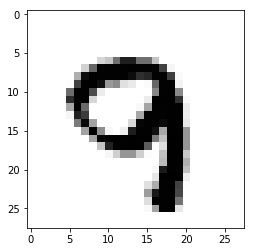

In [13]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(X @ W + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

# Epoch: 전체 데이터 셋에 대해서 1회 학습을 시키는 것을 epoch 이라고 함.
# Batch size: 한 번에 학습시킬 데이터의 개수.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print(f"Epoch: {epoch + 1}, cost = {avg_cost}")
        
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    import matplotlib.pyplot as plt
    import random

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')